In [1]:
import pandas as pd
# K-Means 라이브러리
from sklearn.cluster import KMeans
# 시각화 라이브러리
import matplotlib.pyplot as plt

In [2]:
# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

### 1. 데이터 불러오기

In [3]:
#CSV 파일을 읽어 DataFrame 변수에 저장하기
studentData = pd.read_csv("../dataset/student_middle.csv")
studentData.head()

,NAME,SW,DB,AND
0,ST0001,95,30,0
1,ST0002,50,50,0
2,ST0003,15,30,15
3,ST0004,90,50,20
4,ST0005,75,20,20


### 2. 데이터 분리

In [4]:
### 기본정보 가지고 있기
name = studentData[["NAME"]]
### 특성정보 분리
features = studentData[["SW","DB","AND"]]

### 3. 모델선언 및 자율학습 예측

In [5]:
model = KMeans(n_clusters=2, algorithm="auto")
model.fit(features)
### ATL (Above The Line) 가시적, 
### BTL (Below The Line) 비가시적, 신문광고 등

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 4. 데이터 정리

In [6]:
predict = pd.DataFrame(model.predict(features))
predict.columns=["PREDICT"]

In [7]:
### name, feature, predict 붙이기
result = pd.concat([name, features, predict], axis = 1)
result

,NAME,SW,DB,AND,PREDICT
0,ST0001,95,30,0,1
1,ST0002,50,50,0,1
2,ST0003,15,30,15,1
3,ST0004,90,50,20,1
4,ST0005,75,20,20,1
5,ST0006,100,80,30,0
6,ST0007,15,10,30,1
7,ST0008,100,100,33,0
8,ST0009,65,60,35,1
9,ST0010,90,20,38,1


### 5. 시각화

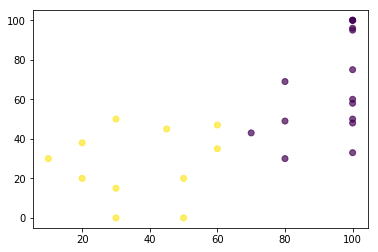

In [8]:
### 시각화 하기
plt.scatter(result['DB'],result["AND"], c=result["PREDICT"], alpha=0.7)

In [9]:
customerData = pd.read_csv("../dataset/customerdata.csv")
customerData.head(20)

,CUSTID,AVERAGEPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6.4,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4.0,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5.0,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6.6,0.900000,Early-bird
4,B10634,3391.074215,2,4.2,2.453656,Sleeping-dog
5,B16849,3755.263391,2,4.7,2.786665,Sleeping-dog
6,B18816,3213.911446,2,6.4,0.900000,Early-bird
7,C10639,3516.500000,2,5.2,2.564830,Big-Screen-lover
8,C12717,3732.900000,2,5.7,2.069995,Big-Screen-lover
9,C15050,4020.173425,2,4.9,3.013440,Sleeping-dog


In [10]:
kopoData = pd.read_csv("../dataset/kopo_customerdata.csv")
kopoData.head()

,CUSTOMERCODE,STATENAME,ST,GENDER,DOB,GENDER1,EMAIL,FEST_CNT,TOTAL_AMOUNT,AC_AMOUNT,AV_AMOUNT,HA_AMOUNT,EMI_CE_AMOUNT,IS_HIGHEND,CNT_VIST,GAP_VISIT
0,1503989,State2,2,Male,0,1,1,0,30300,0,30300,0,0,0,1,0
1,1190338,State2,2,Male,0,1,0,1,46500,0,46500,0,0,0,1,0
2,1424715,State2,2,Female,0,2,0,0,22700,0,0,22700,0,0,1,0
3,2483305,State2,2,Male,0,1,0,1,31400,0,31400,0,0,0,1,0
4,1178802,State2,2,Male,0,1,0,1,44900,0,0,44900,0,0,1,0


In [11]:
custId = customerData[["CUSTID"]]
features = customerData[["DEVICECOUNT","PRODUCTAGE"]]
custtype = customerData[["CUSTTYPE"]]

In [12]:
model = KMeans(n_clusters=3, algorithm="auto")
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
predict = pd.DataFrame(model.predict(features))
predict.columns=["PREDICT"]

In [14]:
result = pd.concat([custId, features, custtype, predict], axis = 1)
result

,CUSTID,DEVICECOUNT,PRODUCTAGE,CUSTTYPE,PREDICT
0,A13566,6.4,1.679181,Big-Screen-lover,1
1,A14219,4.0,2.682023,Sleeping-dog,2
2,A15312,5.0,3.208202,Sleeping-dog,2
3,A16605,6.6,0.900000,Early-bird,1
4,B10634,4.2,2.453656,Sleeping-dog,2
5,B16849,4.7,2.786665,Sleeping-dog,2
6,B18816,6.4,0.900000,Early-bird,1
7,C10639,5.2,2.564830,Big-Screen-lover,0
8,C12717,5.7,2.069995,Big-Screen-lover,0
9,C15050,4.9,3.013440,Sleeping-dog,2


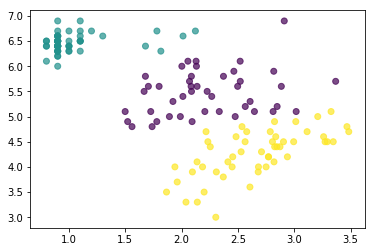

In [15]:
plt.scatter(result['PRODUCTAGE'],result["DEVICECOUNT"], c=result["PREDICT"], alpha=0.7)

In [16]:
import seaborn as sns

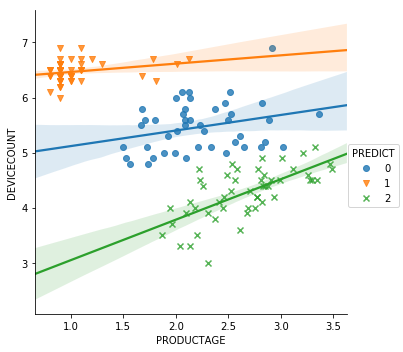

In [17]:
sns.lmplot(x = "PRODUCTAGE", y="DEVICECOUNT", data = result, hue = "PREDICT",  markers = ['o', 'v', 'x'])

In [18]:
result.to_csv("./customerPredict.csv")